<a href="https://colab.research.google.com/github/EmilianoLS/DiTellaML/blob/main/Deep%20Learning/Practica_2_Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Introducción a PyTorch

## a) Calculando el gradiente mediante Autograd

En primer lugar, vamos a calcular del gradiente para el perceptrón simple con función de activación sigmoidea que vimos en la teoría. Pero esta vez, en lugar de realizar manualmente el proceso de backpropagation, vamos a usar el módulo `autograd` de PyTorch.

La función $f(x, w)$ a la cual queremos encontrarle el gradiente es:

> $f(\mathbf{x}, \mathbf{w}) = \frac{1}{1 + e^{-(w_0 x_0 + w_1 x_1 + w_2)}}$

Definimos entonces la función utilizando `torch.tensor` (recordar usar el parámetro `requires_grad = True` para que PyTorch guarde los gradientes) y realizamos la pasada "forward" para los siguientes valores de x y w:

> $\mathbf{x} = (-1, -2)$

> $\mathbf{w} = (2, -3, -3)$



In [ ]:
import torch

x = ....
w = ....

f = .....

print(f)


tensor(0.7311, grad_fn=<MulBackward0>)


Ahora, utilizando la función `f.backward()` computamos los gradientes $\frac{\partial f}{ \partial \mathbf{x}}$ y $\frac{\partial f}{ \partial \mathbf{w}}$

In [ ]:
f.....

In [ ]:
print("Gradiente df/dx = " + str( .... ))
print("Gradiente df/dw = " + str( .... ))

Gradiente df/dx = tensor([ 0.3932, -0.5898])
Gradiente df/dw = tensor([-0.1966, -0.3932,  0.1966])


## b) Minimizando una función con Gradient Descent

Ahora, vamos a implementar usar el algorítmo de gradiente descendiente (utilizando Autograd para computar el gradiente) para minimizar la función cuadrática $$f(x) = 2x^2 + x + 4$$

Utilizaremos la implementación `torch.optim.SGD` de gradiente descendiente.



X = tensor(0., requires_grad=True), f(x) = tensor(4., grad_fn=<AddBackward0>)
X = tensor(-0.0010, requires_grad=True), f(x) = tensor(3.9990, grad_fn=<AddBackward0>)
X = tensor(-0.0020, requires_grad=True), f(x) = tensor(3.9980, grad_fn=<AddBackward0>)
X = tensor(-0.0030, requires_grad=True), f(x) = tensor(3.9970, grad_fn=<AddBackward0>)
X = tensor(-0.0040, requires_grad=True), f(x) = tensor(3.9961, grad_fn=<AddBackward0>)
X = tensor(-0.0050, requires_grad=True), f(x) = tensor(3.9951, grad_fn=<AddBackward0>)
X = tensor(-0.0059, requires_grad=True), f(x) = tensor(3.9941, grad_fn=<AddBackward0>)
X = tensor(-0.0069, requires_grad=True), f(x) = tensor(3.9932, grad_fn=<AddBackward0>)
X = tensor(-0.0079, requires_grad=True), f(x) = tensor(3.9922, grad_fn=<AddBackward0>)
X = tensor(-0.0089, requires_grad=True), f(x) = tensor(3.9913, grad_fn=<AddBackward0>)
X = tensor(-0.0098, requires_grad=True), f(x) = tensor(3.9904, grad_fn=<AddBackward0>)
X = tensor(-0.0108, requires_grad=True), f(x) = tens

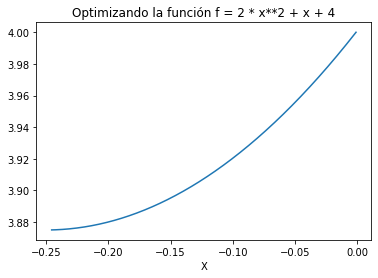

In [ ]:
import matplotlib.pyplot as plt

# Definir la variable que será el parámetro a optimizar
x = torch.tensor(.....)

# Definir el optimizador, indicando el parámetro a optimizar y el learning rate
optimizer = torch.optim.SGD( .... )

# Acumuladores que usaremos para guardar los valores sucesivos de x, y
f_values = []
x_values = []

# Loop de optimización
for i in range(1000):

    # Setemos en 0 los gradientes de todos los elementos
    optimizer.....
       
    # Pasada forward: ejecutar la función a minimizar
    f = .....

    print("X = " + str(x) + ", f(x) = " + str(f))

    # Pasada backward: computar los gradientes
    f......

    # Actualizar los pesos dando un paso de gradiente descendiente
    optimizer....

    # Guardar los valores para luego plotearlos
    f_values.append(f.data.item())
    x_values.append(x.data.item())

# Ploteo los valores
plt.title("Optimizando la función f = 2 * x**2 + x + 4")
plt.xlabel("X")
plt.plot(x_values,f_values)


# c) Implementando un MLP en PyTorch para predicción de precios de inmuebles 

Contamos con una base de datos de 506 precios de inmuebles de la ciudad de Boston [1]. Cada inmueble está descripto por diversas características como el indice de crimen per capita en la zona, o el grado de accesibilidad a autopistas, etc. Se cuenta con el precio de cada uno, y se pretende desarrollar un módulo que permita predecir dicho precio a partir de las características.

[1]: *Hedonic prices and the demand for clean air*, J. Environ. Economics & Management, vol.5, 81-102, 1978.

Primero, vamos a generar un histograma de los precios con todos los datos disponibles:

El dataset contiene dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']) 


Fila de ejemplo:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


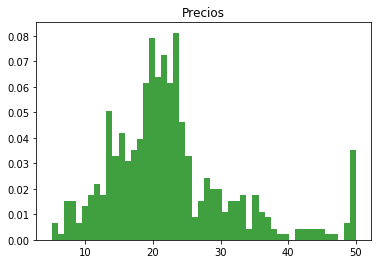

In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

# Importamos el dataset

dataset_boston = load_boston()

print("El dataset contiene " + str(dataset_boston.keys()) + " \n\n")

# Extraigo los datos (features) y los precios (etiquetas a predecir)
data = dataset_boston['data']
data = data.astype(np.float32)
precios = np.expand_dims(dataset_boston['target'], axis=1).astype(np.float32)

print("Fila de ejemplo:")
print(dataset_boston['feature_names'])
print(data[0,:])

# Dibujo un histograma de los precios de los inmuebles
_ = plt.hist( ..... , 50, density=True, facecolor='g', alpha=0.75)
_ = plt.title("Precios")


Particionamos los datos en entrenamiento y prueba usando la función `sklearn.model_selection.train_test_split`

In [ ]:
 from sklearn.model_selection import train_test_split
 
 # Particiono los datos en entrenamiento y prueba usando el método de scikitlearn
 X_train, X_test, y_train, y_test = train_test_split( .... , ..... , test_size=0.33, random_state=42)

Ahora implementaremos un Perceptrón multicapa que usaremos para como regresor del precio utilizando PyTorch (ejemplo basado en el curso de [RPI](https://rpi.analyticsdojo.com/)).

El perceptrón deberá contar con 3 capas:
- Las dos primeras con 100 neuronas, y deberán usar la función de activación ReLU.
- La última con una única neurona cuya salida sea un valor escalar que corresponda al precio estimado del inmueble, que no deberá utilizar ninguna función de activación.

Algunas clases de PyTorch que resultarán útiles para implementar el modelo, son:
- `torch.nn.Linear`: Implementa una capa totalmente conectada. Es necesario especificarle el número de parámetros de entrada y de salida.
- `torch.nn.functional.relu`: Implementa la función de activación ReLU.

Además, utilizaremos el optimizador `torch.optim.Adam` y la función de pérdida `torch.nn.MSELoss` (error cuadrático medio).






Epoch 100, loss = 923.106
Epoch 200, loss = 715.819
Epoch 300, loss = 879.679
Epoch 400, loss = 725.334
Epoch 500, loss = 673.847
Epoch 600, loss = 347.52
Epoch 700, loss = 527.921
Epoch 800, loss = 283.484
Epoch 900, loss = 529.495
Epoch 1000, loss = 401.049
Epoch 1100, loss = 201.275
Epoch 1200, loss = 118.789
Epoch 1300, loss = 226.777
Epoch 1400, loss = 87.881
Epoch 1500, loss = 63.0272
Epoch 1600, loss = 100.337
Epoch 1700, loss = 65.8468
Epoch 1800, loss = 129.8
Epoch 1900, loss = 46.6197
Epoch 2000, loss = 95.6299
Epoch 2100, loss = 60.0859
Epoch 2200, loss = 37.3812
Epoch 2300, loss = 63.4171
Epoch 2400, loss = 123.206
Epoch 2500, loss = 67.7605
Epoch 2600, loss = 74.0231
Epoch 2700, loss = 82.4982
Epoch 2800, loss = 40.9975
Epoch 2900, loss = 49.8836
Epoch 3000, loss = 85.0704
Epoch 3100, loss = 54.7555
Epoch 3200, loss = 67.2247
Epoch 3300, loss = 58.443
Epoch 3400, loss = 121.901
Epoch 3500, loss = 123.038
Epoch 3600, loss = 59.1262
Epoch 3700, loss = 100.994
Epoch 3800, los

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento')

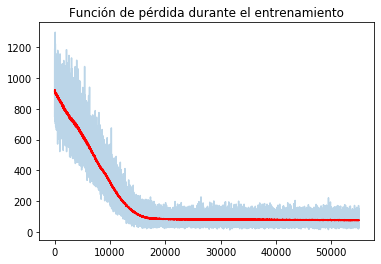

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Tamaño del batch de entrenamiento
batch_size = 50

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 0.00001

class Net(torch.nn.Module):
    def __init__(self, input_features, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = .....
        self.hidden2 = .....
        self.out = .....

    def forward(self, x):
        x = .....      # activation function for hidden layer
                     # linear output
        return x

# Definimos el modelo del perceptrón
net = Net( .... , ..... , ......)

# Construimos el optimizador, y le indicamos que los parámetros a optimizar 
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam( ...... , lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = .....

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan 
# ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a un batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

# Número de épocas
num_epochs = 5000

# Lista en la que iremos guardando el valor de la función de pérdida en cada 
# etapa de entrenamiento
loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    # Itero sobre todos los batches del dataset
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.......

        # Realizo la pasada forward computando la loss entre la salida de la red `net(x)` y las etiquetas `y`
        loss = .......
        
        # Realizo la pasada backward por la red        
        loss......
        
        # Actualizo los pesos de la red con el optimizador
        optimizer.......

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento")


MSE medio en training: 75.63646254973968
MSE medio en test: 64.81397696010436


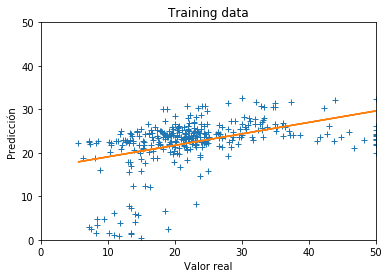

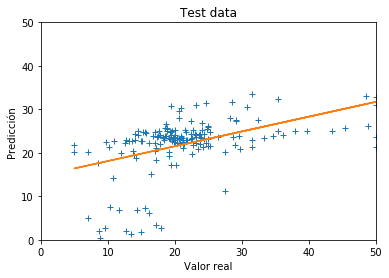

In [ ]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm

# Definimos un método para mostrar las predicciones como un scatter plot 
# y graficamos la recta de regresión para esos datos.

def plotScatter(x_data, y_data, title, fit_line=True):
  plt.figure()
  
  plt.plot(x_data, y_data, '+')
  plt.xlabel('Valor real')
  plt.ylabel('Predicción')
  plt.ylim((0,50))
  plt.xlim((0,50))
  plt.title(title)

  if fit_line:
    X, Y = x_data.reshape(-1,1), y_data.reshape(-1,1)
    plt.plot( X, LinearRegression().fit(X, Y).predict(X) )

# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test)**2).mean()))


# Entregable 
1. Encontrar el mínimo de la función *f* definida en el apartado b). Para ello, deberán encontrar primero la derivada *f'(x)* de forma analítica, y utilizarla para computar el mínimo de la función. Posteriormente, deberán corrobarar que el valor coincida con el que obtuvieron optimizando la función con gradiente descendiente. 

2. Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia. Probar colocando 2, 10 y 200 neuronas en dichas capas, al entrenar los perceptrones durante 5000 épocas. Mostrar los resultados utilizando:

* los gráficos de dispersión con la recta de regresión
* el error medio en los datos de entrenamiento y test

  Analizar la relación entre dichos resultados y la cantidad de neuronas que posee el perceptrón.
 